# Statistics

- Measure & Analyze the data (Structured Data)

**Types of statistics**

- Descriptive statistics :
- collecting,measuring,presenting and describing data

- inferential statistics :
- drawing conclusion and/or making decisions concerning a population based on sample data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Measures of Central Tendency (1st Business Moment)

- Mean , Median , Mode
- Mean & Median are applied on continous data
- Mode is applied on discrete data

**Mean**

- sum of all data values/Total no.of data values
- Mean is applied on continous data

In [2]:
df = pd.DataFrame({"x":[1,2,3,4,5]})
df

,x
0,1
1,2
2,3
3,4
4,5


In [3]:
df["x"].mean()

3.0

In [4]:
df["x"].sum()/len(df)

3.0

**Median**

- Refers to the data value that is positioned in the middle of an ordered dataset
- Median is applied on continous data
- Median refers to centre value if you have odd number of data points
- Median refers to average of centre 2 values if you have even number of data points

In [5]:
df=pd.DataFrame({"y":[2,4,1,9,16,10,4,8,7],"z":[5,4,3,6,8,9,1,2,10]})
df

,y,z
0,2,5
1,4,4
2,1,3
3,9,6
4,16,8
5,10,9
6,4,1
7,8,2
8,7,10


In [6]:
df["y"].median()

7.0

In [7]:
df["z"].median()

5.0

**Mode**

- Most repeated value/Most frequent value

1) Unimodal Data - If the data have only 1 mode value
2) Bimodal Data - If the data have 2 mode values
3) Multimodal Data - If the data have more than 2 mode values

In [8]:
df = pd.DataFrame({"x":[1,1,2,3,4,5],"y":[1,1,2,3,4,4],
                   "z":[1,1,2,2,3,3,],"i":[1,2,3,4,5,6]})
df

,x,y,z,i
0,1,1,1,1
1,1,1,1,2
2,2,2,2,3
3,3,3,2,4
4,4,4,3,5
5,5,4,3,6


In [9]:
df["x"].mode()          #unimodal data

0    1
Name: x, dtype: int64

In [10]:
df["y"].mode()          #bimodal data

0    1
1    4
Name: y, dtype: int64

In [11]:
df["z"].mode()          #multimodal data

0    1
1    2
2    3
Name: z, dtype: int64

In [12]:
df["i"].mode()

0    1
1    2
2    3
3    4
4    5
5    6
Name: i, dtype: int64

# Measures of Dispersion

In [13]:
df = pd.DataFrame({"x":[1,2,3,4,5]})
df

,x
0,1
1,2
2,3
3,4
4,5


**Minimum**

In [14]:
df["x"].min()

1

**Maximum**

In [15]:
df["x"].max()

5

**Range**

- Range = Maximum value - minimum value

In [16]:
df["x"].max()-df["x"].min()

4

**Deviation (X-μ)**

- Deviation = Data deviated from the mean = how dispersed the data is from the central value

In [17]:
df["x-μ"] = df["x"] - df["x"].mean()
df

,x,x-μ
0,1,-2.0
1,2,-1.0
2,3,0.0
3,4,1.0
4,5,2.0


In [18]:
df["(x-μ)**2"] = df["x-μ"]**2
df

,x,x-μ,(x-μ)**2
0,1,-2.0,4.0
1,2,-1.0,1.0
2,3,0.0,0.0
3,4,1.0,1.0
4,5,2.0,4.0


In [19]:
var= df["(x-μ)**2"].mean()
var

2.0

In [20]:
#population variance(σ2)
df["x"].var(ddof=0)

2.0

In [21]:
#Sample variance(s**2)
df["x"].var(ddof=1)

2.5

In [22]:
#population std deviation
df["x"].std(ddof=0)

1.4142135623730951

In [23]:
#sample std deviation
df["x"].std(ddof=1)

1.5811388300841898

**Coefficient of variation**

standard deviation / mean *100

In [24]:
df["x"].std(ddof=0)/df["x"].mean()

0.47140452079103173

**Percentile**

In [18]:
df = pd.DataFrame({"X":[10,11,12,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,X
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


In [21]:
# 0 percentile or minimum
df["X"].quantile(0)

10.0

In [22]:
# 25 percentile (Q1)
Q1 = df["X"].quantile(0.25)
Q1

25.0

In [23]:
# 50 percentile (Q2)
Q2 = df["X"].quantile(0.50)
Q2

33.0

In [24]:
# 75 percentile (Q3)
Q3 = df["X"].quantile(0.75)
Q3

36.0

In [25]:
# 100 percentile or maximum
df["X"].quantile(1)

59.0

In [26]:
df["X"].quantile([0,0.25,0.50,0.75,1])

0.00    10.0
0.25    25.0
0.50    33.0
0.75    36.0
1.00    59.0
Name: X, dtype: float64

**Inter Quartile Range**

In [27]:
IQR = Q3 - Q1
IQR

11.0

**Lower limit**

In [31]:
ll = Q1 - (1.5 * IQR)
ll

8.5

**Upper limit**

In [32]:
ul = Q3 + (1.5 * IQR)
ul

52.5

# Outlier

- A Data value that is numerically distant from a data set

- A data value considered to be an outlier ,if
- data value < lower limit(Q1 - 1.5*IQR)
- data value > upper limit(Q3 + 1.5*IQR)

**for checking outliers we use boxplot by using matplotlib**

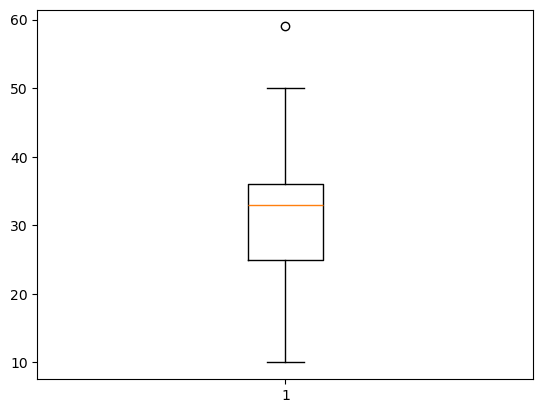

In [35]:
plt.boxplot(df["X"])
plt.show()                #with matplotlib      

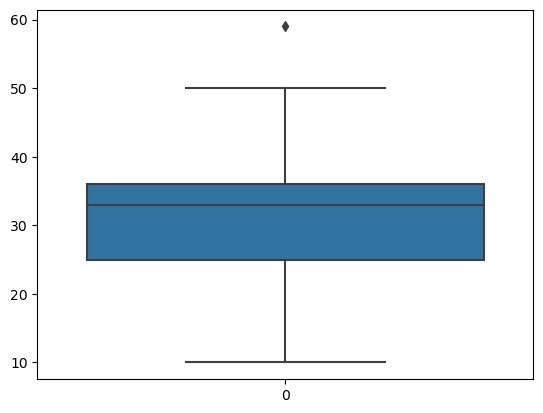

In [36]:
sns.boxplot(df["X"])
plt.show()             # by using seaborn 

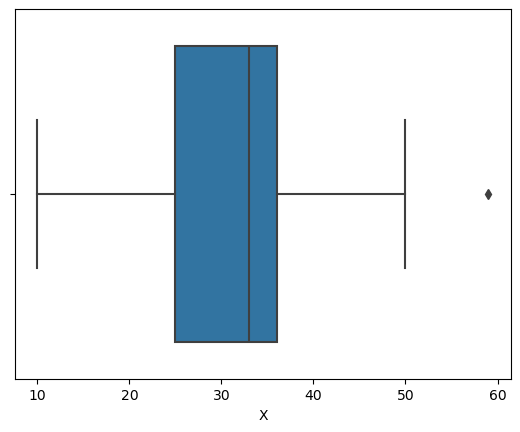

In [37]:
sns.boxplot(x=df["X"])
plt.show()                   # by using seaborn

**To  extract outliers data**

In [33]:
df[(df["X"]<ll) | (df["X"]>ul)]

,X
14,59


In [34]:
df[(df["X"]<8.5) | (df["X"]>52.5)]

,X
14,59


# Probability

- Chance of occurence
- probability(Requirement) = No.of value satisfies your requirement/total no.of values
- Always probability value lies between 0 to 1
- sum of all the probabilities = 1

In [7]:
df = pd.DataFrame({"Gender": ["F","F","F","F","M","M","F","M","F","F","F","F","M","M","F","M"],
                   "Marks":[30,41,42,51,52,53,61,62,68,69,77,78,79,88,89,100],
                   "no_of_assignments":[1,1,1,1,2,2,2,3,3,3,3,3,4,4,4,4]})
df

,Gender,Marks,no_of_assignments
0,F,30,1
1,F,41,1
2,F,42,1
3,F,51,1
4,M,52,2
5,M,53,2
6,F,61,2
7,M,62,3
8,F,68,3
9,F,69,3


# Frequency distribution

- Graphical representation of variable with corresponding frequency

**Discrete Frequency Distribution** : Graphical representation of Discrete variable with corresponding frequency

In [8]:
df["Gender"].unique().tolist()

['F', 'M']

In [9]:
df["Gender"].value_counts()

Gender
F    10
M     6
Name: count, dtype: int64

In [10]:
sns.__version__

'0.13.2'

In [11]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


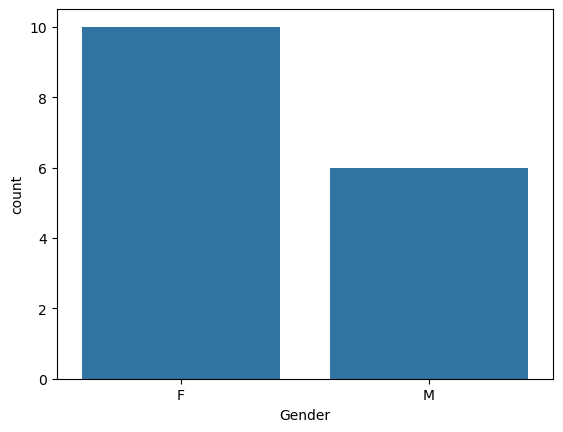

In [12]:
sns.countplot(x=df["Gender"],)
plt.show()

**Continuous Frequency Distribution** : Graphical representation of continuous variable with corresponding frequency

In [13]:
import warnings
warnings.filterwarnings("ignore")

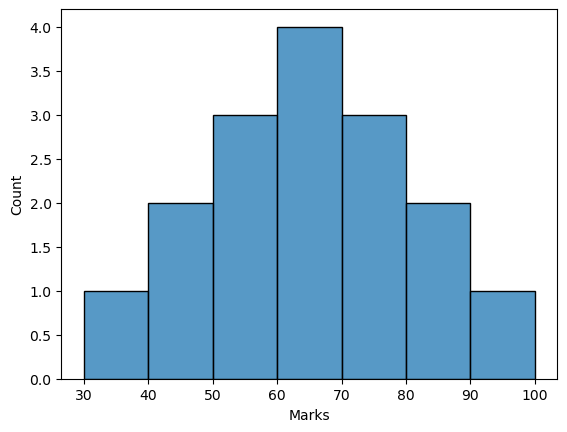

In [45]:
sns.histplot(x=df["Marks"],bins=7,stat="count")
plt.show()

**Cumulative Frequency Distribution**

<Axes: xlabel='Marks', ylabel='Count'>

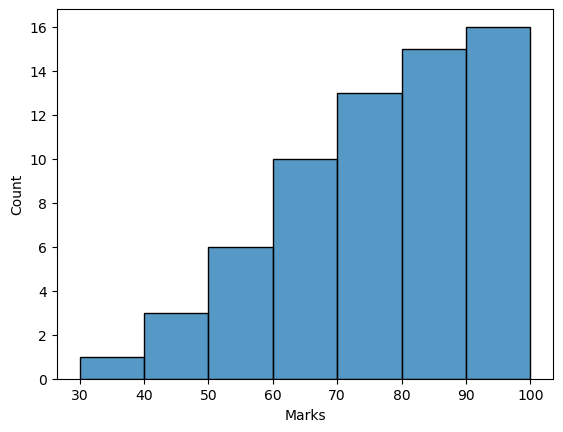

In [46]:
sns.histplot(df["Marks"],bins=7,stat="count",cumulative=True)

# probability distribution

- Graphical representation of variable & respective probabilities of variable

**Discrete Probability distribution**: Graphical representation of discrete variable with corresponding probability

In [2]:
import seaborn as sns

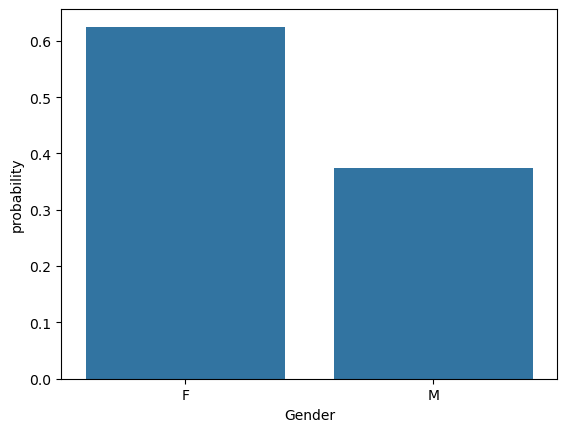

In [14]:
sns.countplot(x=df["Gender"],stat="probability")
plt.show()

**Continuous probability distribution**: Graphical representation of continuous variable with corresponding probability

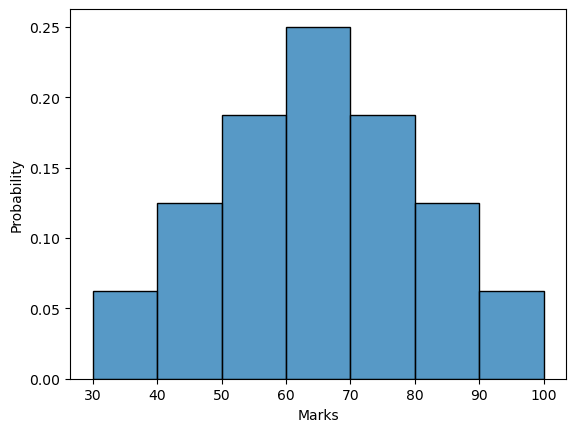

In [48]:
sns.histplot(df["Marks"],bins=7,stat="probability")
plt.show()

**Cumulative probability distribution**

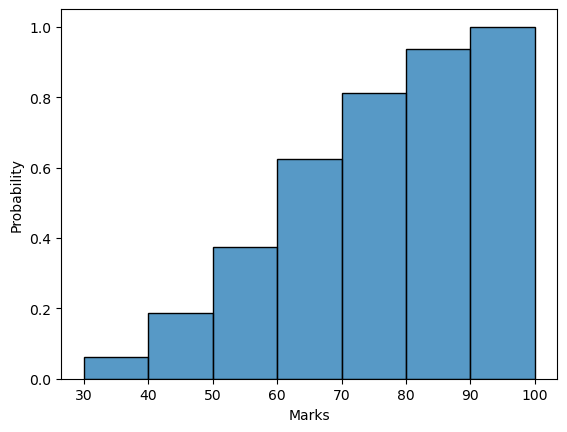

In [15]:
sns.histplot(df["Marks"],bins=7,stat="probability",cumulative=True)
plt.show()

In [16]:
sns.__version__

'0.13.2'

# Measure of shape (3rd Business moment)

**Skewness|**

- It tells, whether the data is symmetrical or unsymmetrical distribution
- it describes asymmetry from the normal distribution
- symmetrical distribution is called as **normal distribution**
- Unsymmetrical distribution is known as **Skewed Distribution**

In [37]:
df = pd.DataFrame({"X":[1,2,3,4,5]})
df

,X
0,1
1,2
2,3
3,4
4,5


In [39]:
df["X"].skew()

0.0

- if Skewness = 0 then it is **Perfect Symmetrical or Perfect normal distribution**
- if Skewness < 0 then it is said to be **Negative Skewed or Left skewed distribution**
- if Skewness > 0 then it is said to be **Positive skewed or Right skewed distribution**

- -1<Skewness<+1 then it is called **Normal distribution**

In [2]:
df = pd.DataFrame({"X":[0,11,12,21,22,23,31,32,38,39,47,48,49,58,59,70],
                  "Y":[0,11,12,21,22,23,24,28,29,33,34,35,37,44,59,70],
                  "Z":[0,11,12,21,22,23,34,38,49,43,44,45,47,54,59,70]})
df

,X,Y,Z
0,0,0,0
1,11,11,11
2,12,12,12
3,21,21,21
4,22,22,22
5,23,23,23
6,31,24,34
7,32,28,38
8,38,29,49
9,39,33,43


**Symmetrical distribution or Normal distribution**

                           mean  =  median

In [3]:
# mean
df["X"].mean()

35.0

In [4]:
# Median
df["X"].median()

35.0

In [5]:
df["X"].skew()

0.0

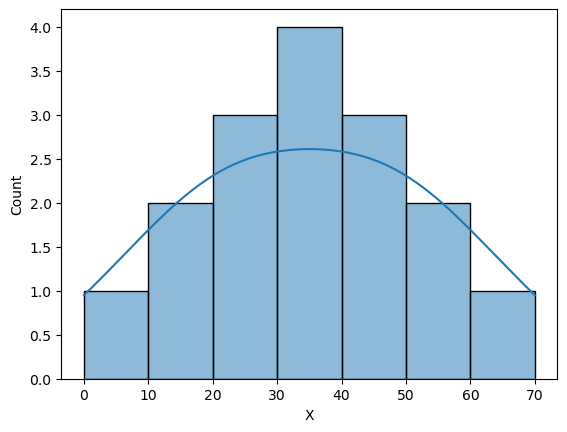

In [6]:
sns.histplot(df["X"],bins=7,kde=True)
plt.show()

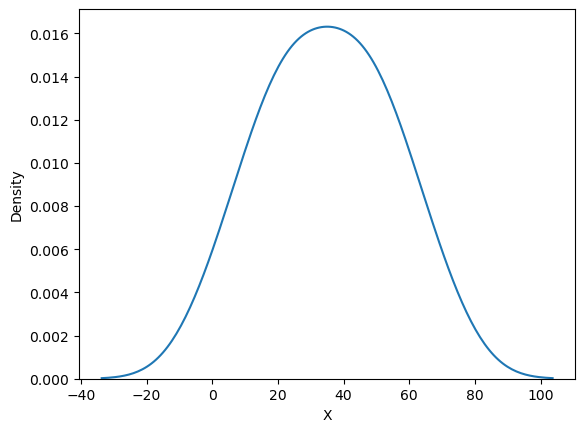

In [7]:
sns.kdeplot(df["X"])
plt.show()

**Right Skewed distribution or Positively Skewed distribution**

                                   Mean > Median

In [8]:
df["Y"].mean()

30.125

In [9]:
df["Y"].median()

28.5

In [10]:
df["Y"].skew()

0.6978985152470283

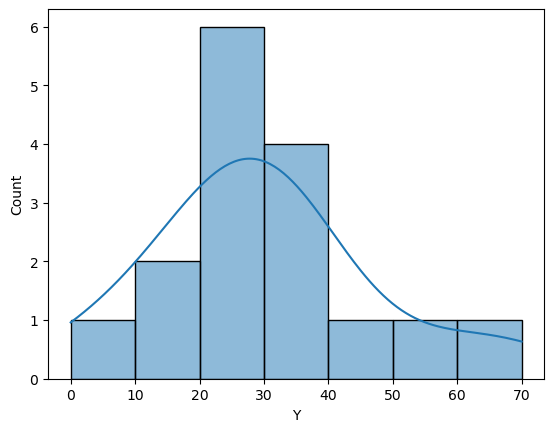

In [11]:
sns.histplot(df["Y"],bins=7,kde=True)
plt.show()

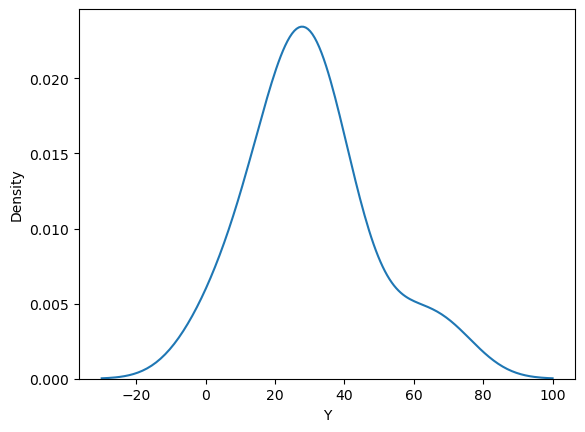

In [12]:
sns.kdeplot(df["Y"])
plt.show()

**Left skewed Distribution or Negative skewed distribution**

                            mean < median

In [13]:
df["Z"].mean()

35.75

In [14]:
df["Z"].median()

40.5

In [15]:
df["Z"].skew()

-0.18882851815445098

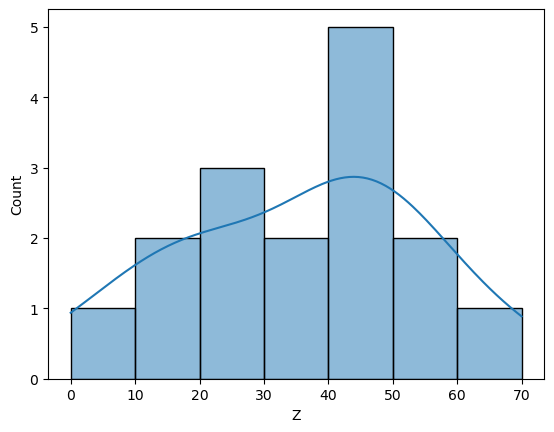

In [16]:
sns.histplot(df["Z"],bins=7,kde=True)
plt.show()

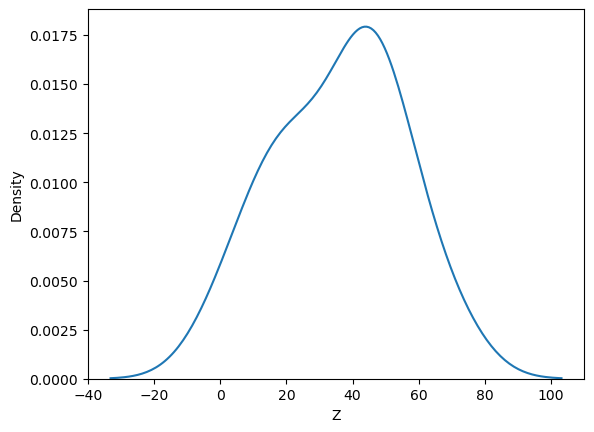

In [17]:
sns.kdeplot(df["Z"])
plt.show()

In [18]:
df1 = pd.DataFrame({"Score":[19,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,20]})
df1

,Score
0,19.0
1,19.1
2,19.2
3,19.3
4,19.4
5,19.5
6,19.6
7,19.7
8,19.8
9,20.0


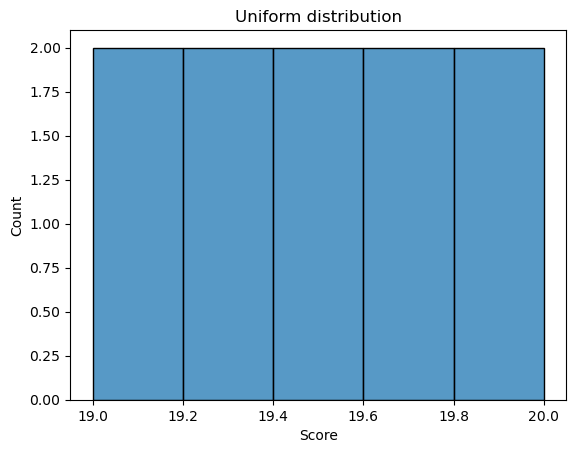

In [19]:
sns.histplot(df1["Score"])
plt.title("Uniform distribution")
plt.show()

**When they have not given the data set**: at that time we have two option's **1)68-95-99.7% rule** & **Z-score**

**works only on normal distributed data,if it is skewed data convert it to normal distributed and apply the logic**

for **Normal distribution data**,we have **68-95-99.7% Rule**

**Ex**: If you have a data of a company with 1000 employees salaries & they form normal distribution, with mean = 70000 & std.deviation of 5000
- 50% of employees salaries are less than 70000 & 50% of employees salaries are above 70000
- 68% of employees salaries lies between 65000 to 75000
- 95% of employees salaries lies between 60000 to 80000
- 99.7% of employees salaries lies between 55000 to 85000

**We gathered data from last mock test conducted at NareshIT and found that it followed normal distribution with mean of 70 & std.deviation of 10**

1) What is the probability of students having marks below 70 ?
  **ans** : 50% or 0.5
2) What is the probability of students having marks above 70 ?
  **ans** : 50% or 0.5
3) What is the probability of students having marks between 70 and 90?
  **ans** : 47.5% or 0.475
4) What is the probability of students having marks between 60 and 90 ?
  **ans** : 81.5% or 0.815
5) What is the probability of students having marks between 50 and 90 ?
  **ans** : 95% or 0.95

In [25]:
df

,X,Y,Z
0,0,0,0
1,11,11,11
2,12,12,12
3,21,21,21
4,22,22,22
5,23,23,23
6,31,24,34
7,32,28,38
8,38,29,49
9,39,33,43


In [31]:
μ = df["X"].mean()       # mean value = middle value of density grapgh = 35.0
μ                    

35.0

In [33]:
std_σ = df["X"].std(ddof=0)
std_σ                      

18.920887928424502

In [34]:
μ + 1*std_σ

53.920887928424506

In [35]:
16 * 0.68

10.88

**Z - score**

**z = (x-μ)/σ**

**Calculate probability using z-score**

**We gathered data from last mock test conducted at NareshIT and found that it followed normal distribution with mean of 60 & std.deviation of 10**

- 1) Question-->  What proportion of students scored less than 49 in that exam ?

In [7]:
zvalue = (49-60)/10
zvalue

-1.1

In [9]:
from scipy import stats
stats.norm.cdf(zvalue)           # cdf= cumulative density function

0.13566606094638267

In [10]:
# if you want only 3decimals
round(stats.norm.cdf(zvalue),3)

0.136

**We gathered data from last mock test conducted at NareshIT and found that it followed normal distribution with mean of 60 & std.deviation of 10**

- 2) Question-->  What proportion of students scored between 50 & 70 in that exam ?
     - by using 68-95-99.7% rule &
     - by using z-score

In [16]:
# by using 68-95-99.7% rule
# mue_value(mean)=60
#std.deviation=10
#ans == 34+34 = 68% by using normal distribution table

In [21]:
# by using z-score
#first calculate probability(0 to 70)
# i.e, p(x<70)
z1 = (70-60)/10
z1

1.0

In [25]:
round(stats.norm.cdf(z1),3)

0.841

In [23]:
# next calculate probability(0 to 50)
# i.e, p(x<50)
z2=(50-60)/10
z2

-1.0

In [26]:
round(stats.norm.cdf(z2),3)

0.159

In [31]:
#big value - small value
#answer
round((0.841 -0.159),2)

0.68

# Bivariate & Multivariate Analysis

In [2]:
df4 = pd.DataFrame({"X":[11,22,13,24,30],
                   "Y":[10,9,8,7,6],
                   "Z":[18,19,21,22,40]})
df4

,X,Y,Z
0,11,10,18
1,22,9,19
2,13,8,21
3,24,7,22
4,30,6,40


**Covariance**

In [39]:
#code to find cov(x,y,z)
df4.cov()

,X,Y,Z
X,62.50,-10.00,54.25
Y,-10.00,2.50,-11.75
Z,54.25,-11.75,82.50


**Correlation**

In [3]:
#code to find correlation(x,y,z)
df4.corr()

,X,Y,Z
X,1.000000,-0.800000,0.755497
Y,-0.800000,1.000000,-0.818165
Z,0.755497,-0.818165,1.000000


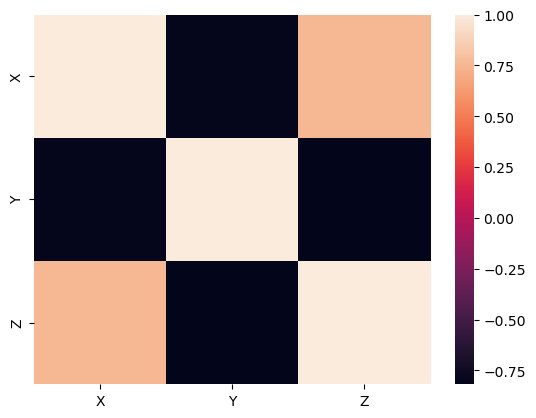

In [9]:
sns.heatmap(df4.corr())
plt.show()